# Explanatory Data Analysis and Classification
## Introduction
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.


![Image.JPG](https://www.breastcancerfoundation.org.nz/images/assets/104043/large?v=0.6889723315052965)

## Analysis Content
1. [Data Content](#1)
2. [Read and Analyse Data](#2)
3. [Visualization](#3)
4. [Edit Data](#4)
5. [Model Training](#5)
1. [Data Content](#1)
1. [Data Content](#1)
1. [Data Content](#1)
1. [Data Content](#1)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/breast-cancer-wisconsin-data/data.csv


<a id="1" > </a>
## Data Content
* ID number
* Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:
1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

<a id="2" > </a>
## Read and Analyse Data

In [2]:
data = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
data.head()
# Result : Unnamed: 32 and id colums took off .

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [3]:
data = data.drop(['Unnamed: 32', 'id'], axis=1) 
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
info= pd.DataFrame(data.isnull().sum(),columns=["IsNull"])
info.insert(1,"Duplicate",data.duplicated().sum(),True)
info.insert(2,"Unique",data.nunique(),True)
info.insert(3,"Min",data.min(),True)
info.insert(4,"Max",data.max(),True)
info

IsNull  Duplicate  Unique       Min      Max
diagnosis                     0          0       2         B        M
radius_mean                   0          0     456     6.981    28.11
texture_mean                  0          0     479      9.71    39.28
perimeter_mean                0          0     522     43.79    188.5
area_mean                     0          0     539     143.5   2501.0
smoothness_mean               0          0     474   0.05263   0.1634
compactness_mean              0          0     537   0.01938   0.3454
concavity_mean                0          0     537       0.0   0.4268
concave points_mean           0          0     542       0.0   0.2012
symmetry_mean                 0          0     432     0.106    0.304
fractal_dimension_mean        0          0     499   0.04996  0.09744
radius_se                     0          0     540    0.1115    2.873
texture_se                    0          0     519    0.3602    4.885
perimeter_se                  0          0     533     0.757    21.98
area_se                       0          0     528     6.802    542.2
smoothness_se                 0          0     547  0.001713  0.03113
compactness_se                0          0     541  0.002252   0.1354
concavity_se                  0          0     533       0.0    0.396
concave points_se             0          0     507       0.0  0.05279
symmetry_se                   0          0     498  0.007882  0.07895
fractal_dimension_se          0          0     545  0.000895  0.02984
radius_worst                  0          0     457      7.93    36.04
texture_worst                 0          0     511     12.02    49.54
perimeter_worst               0          0     514     50.41    251.2
area_worst                    0          0     544     185.2   4254.0
smoothness_worst              0          0     411   0.07117   0.2226
compactness_worst             0          0     529   0.02729    1.058
concavity_worst               0          0     539       0.0    1.252
concave points_worst          0          0     492       0.0    0.291
symmetry_worst                0          0     500    0.1565   0.6638
fractal_dimension_worst       0          0     535   0.05504   0.2075

In [6]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<a id="3" > </a>
## Visualization

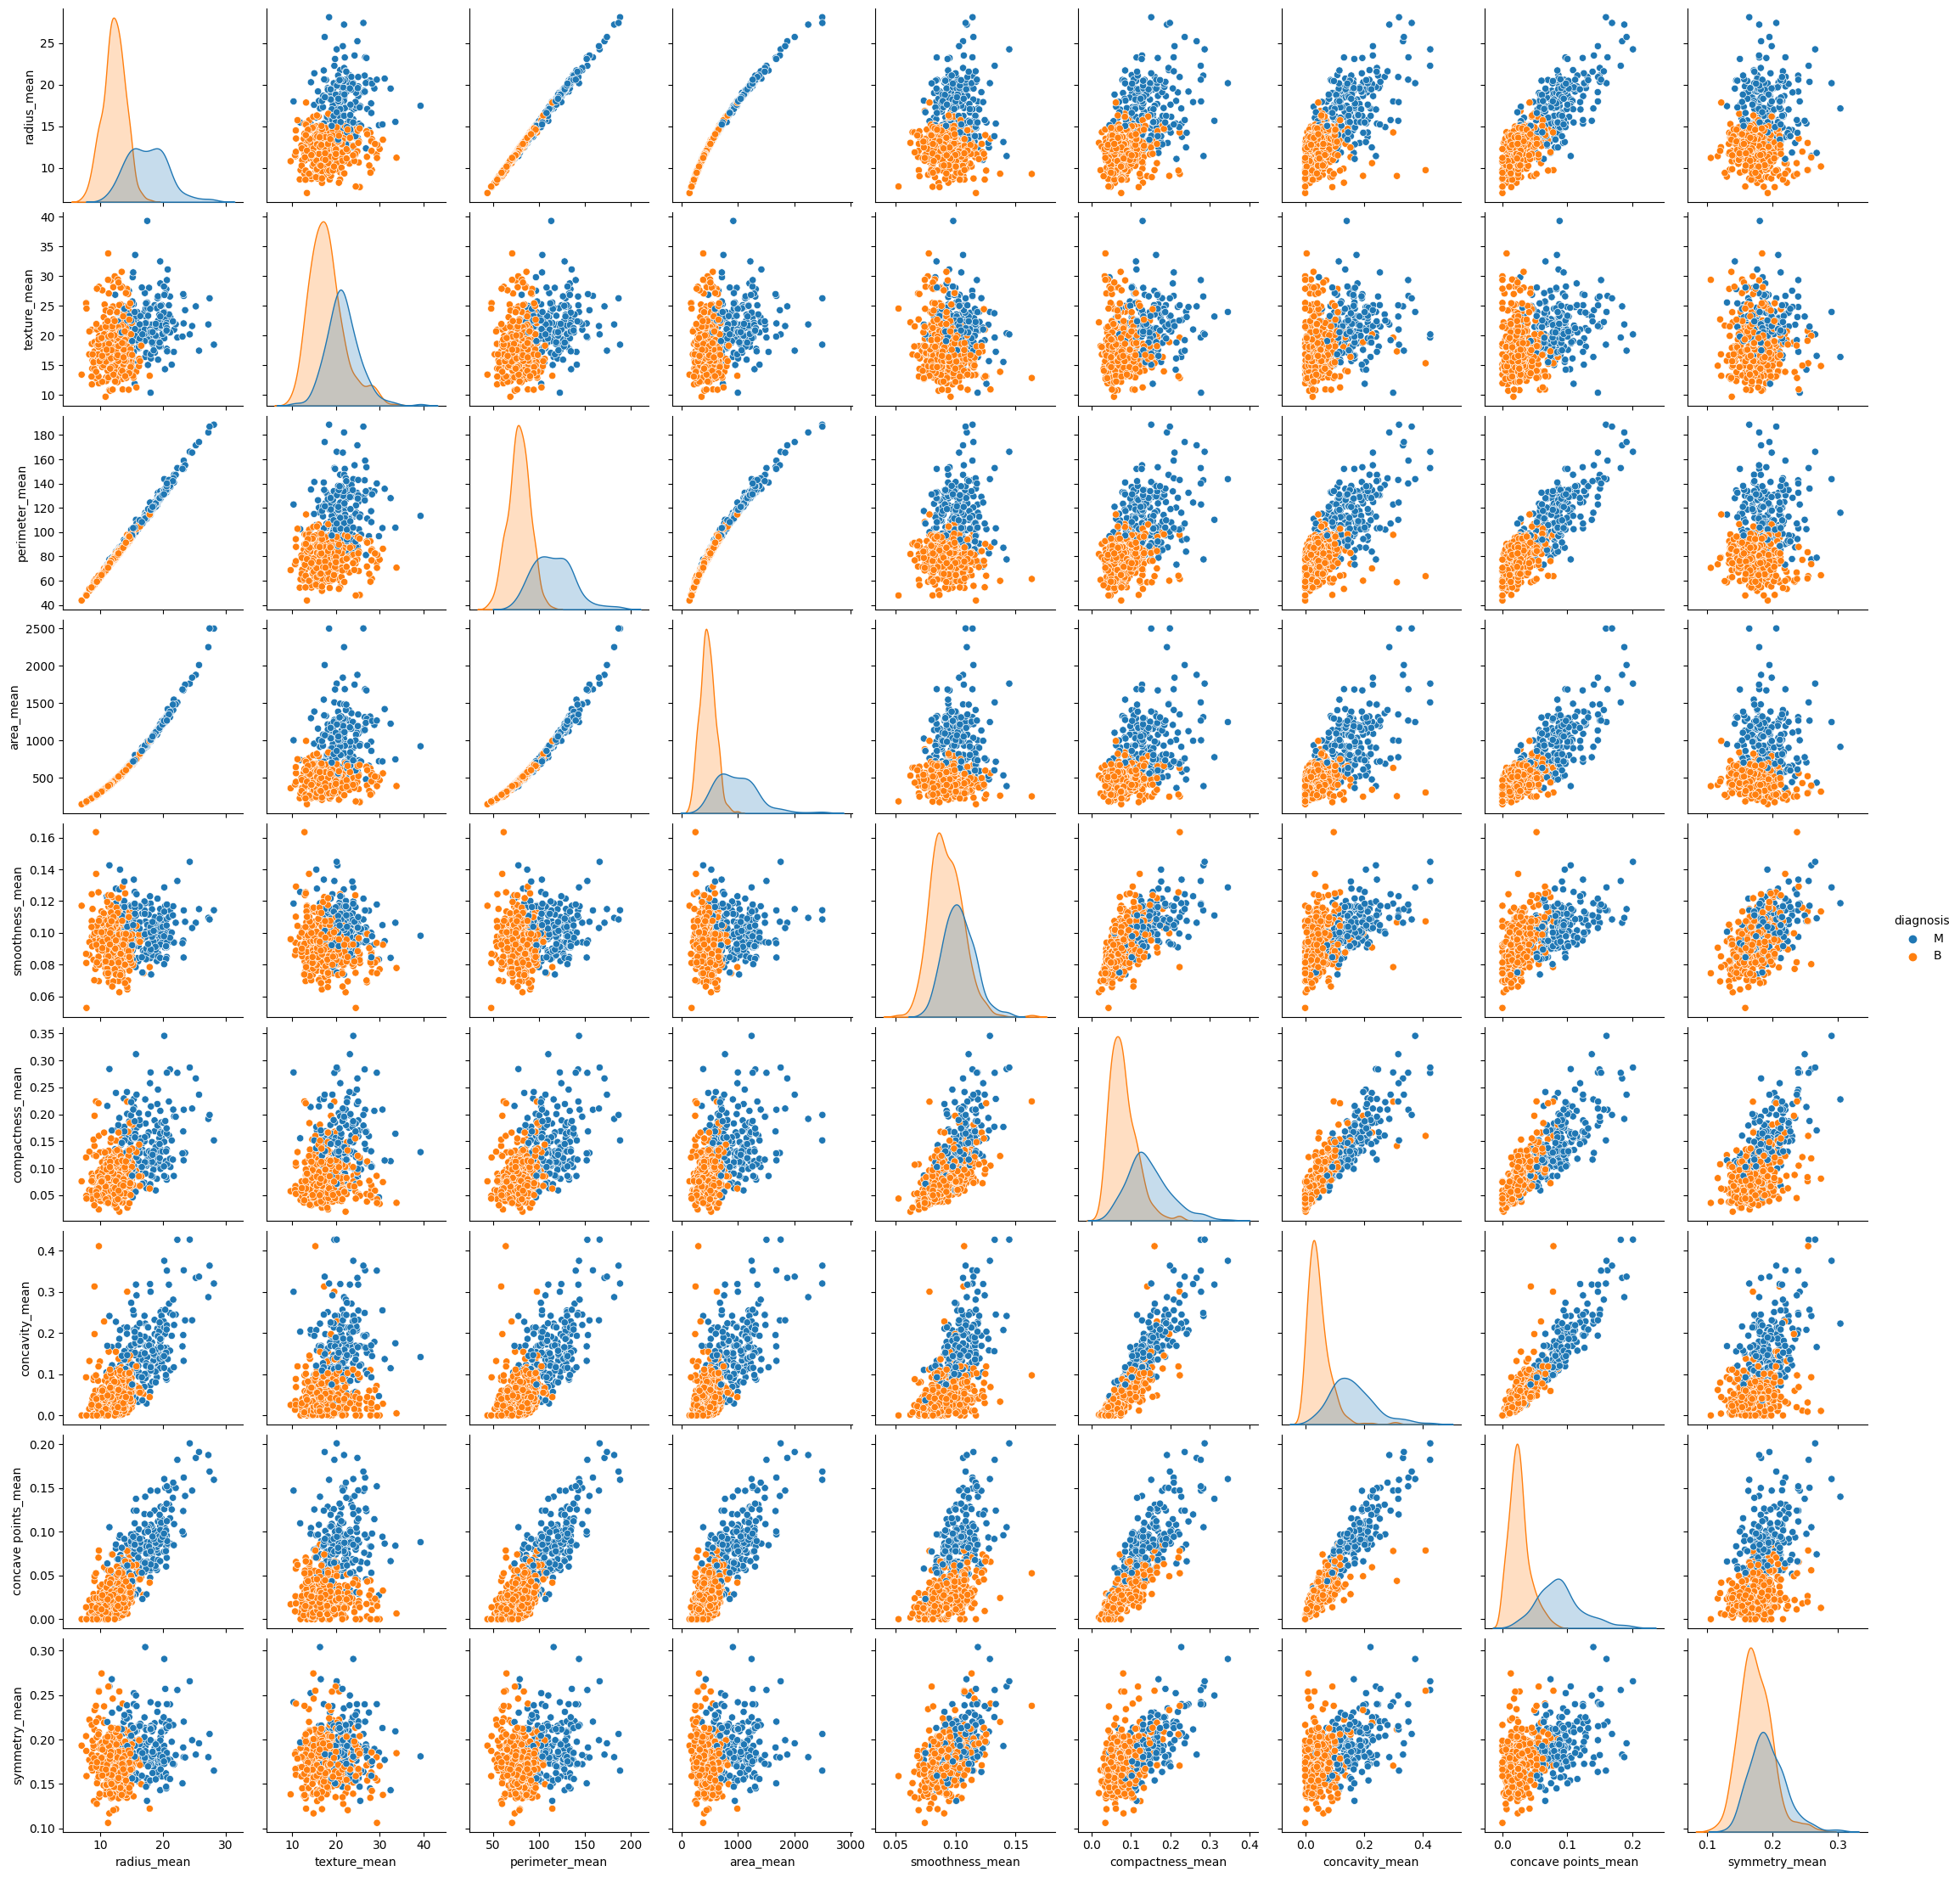

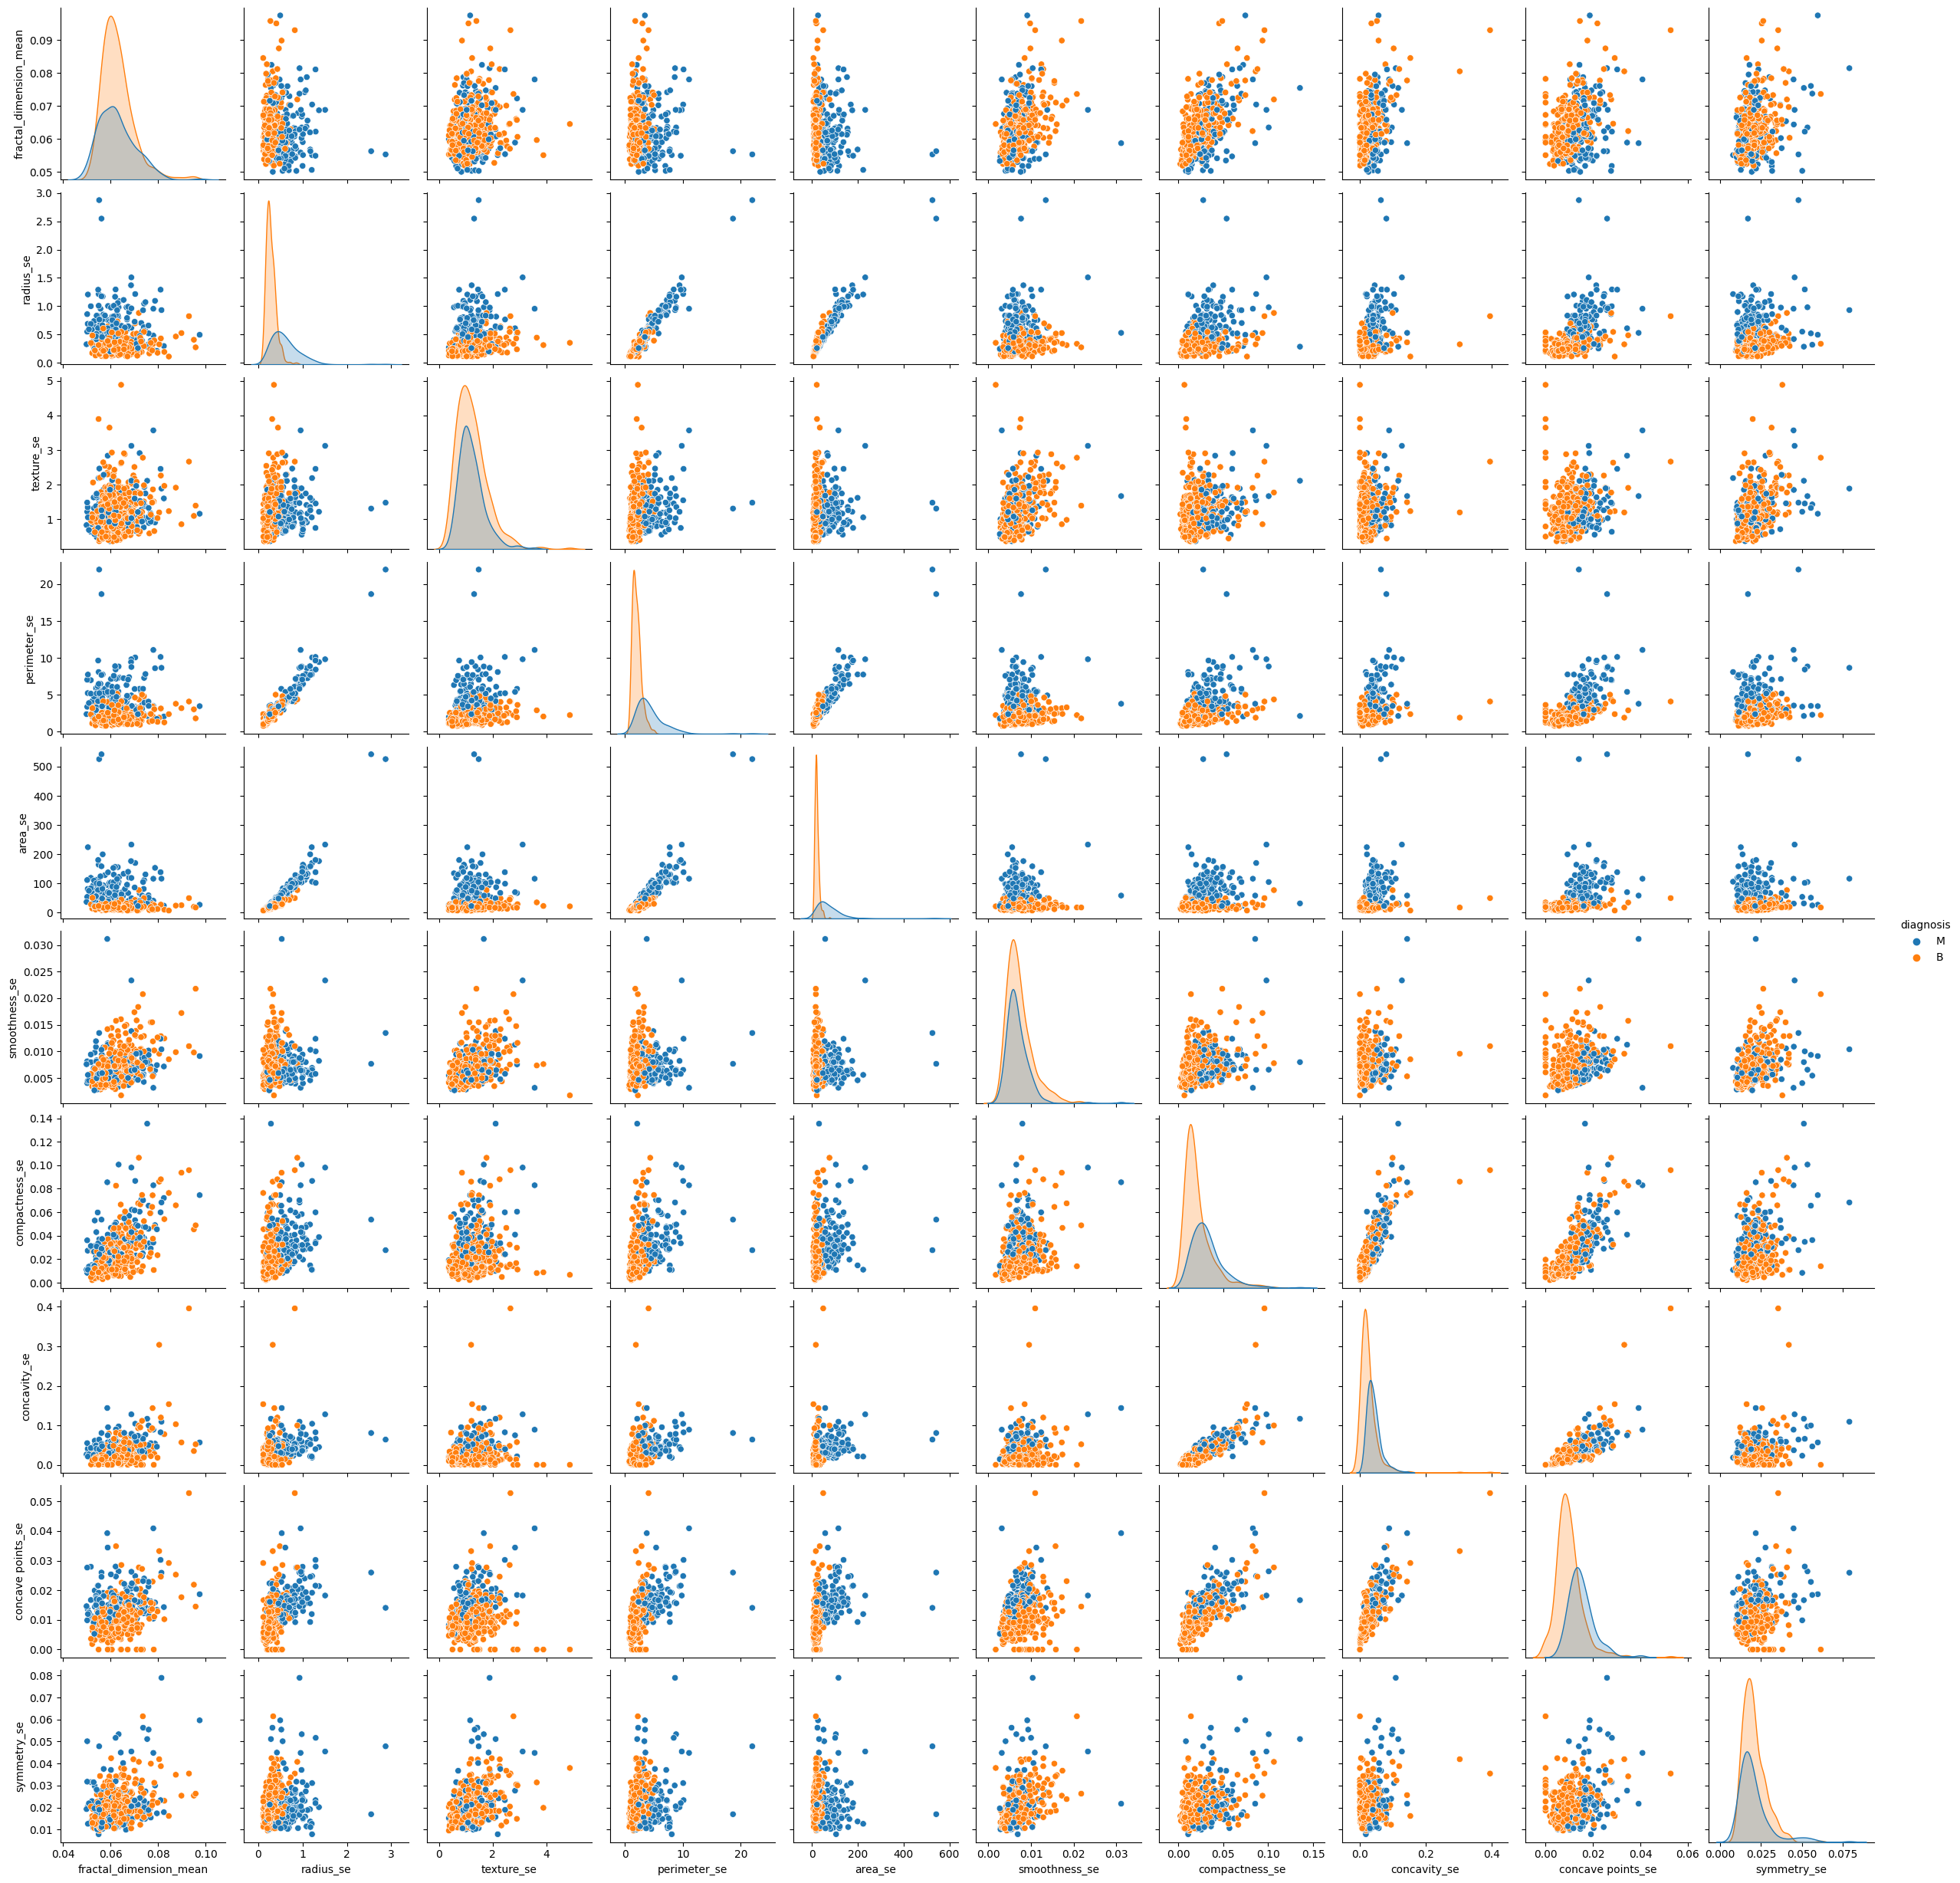

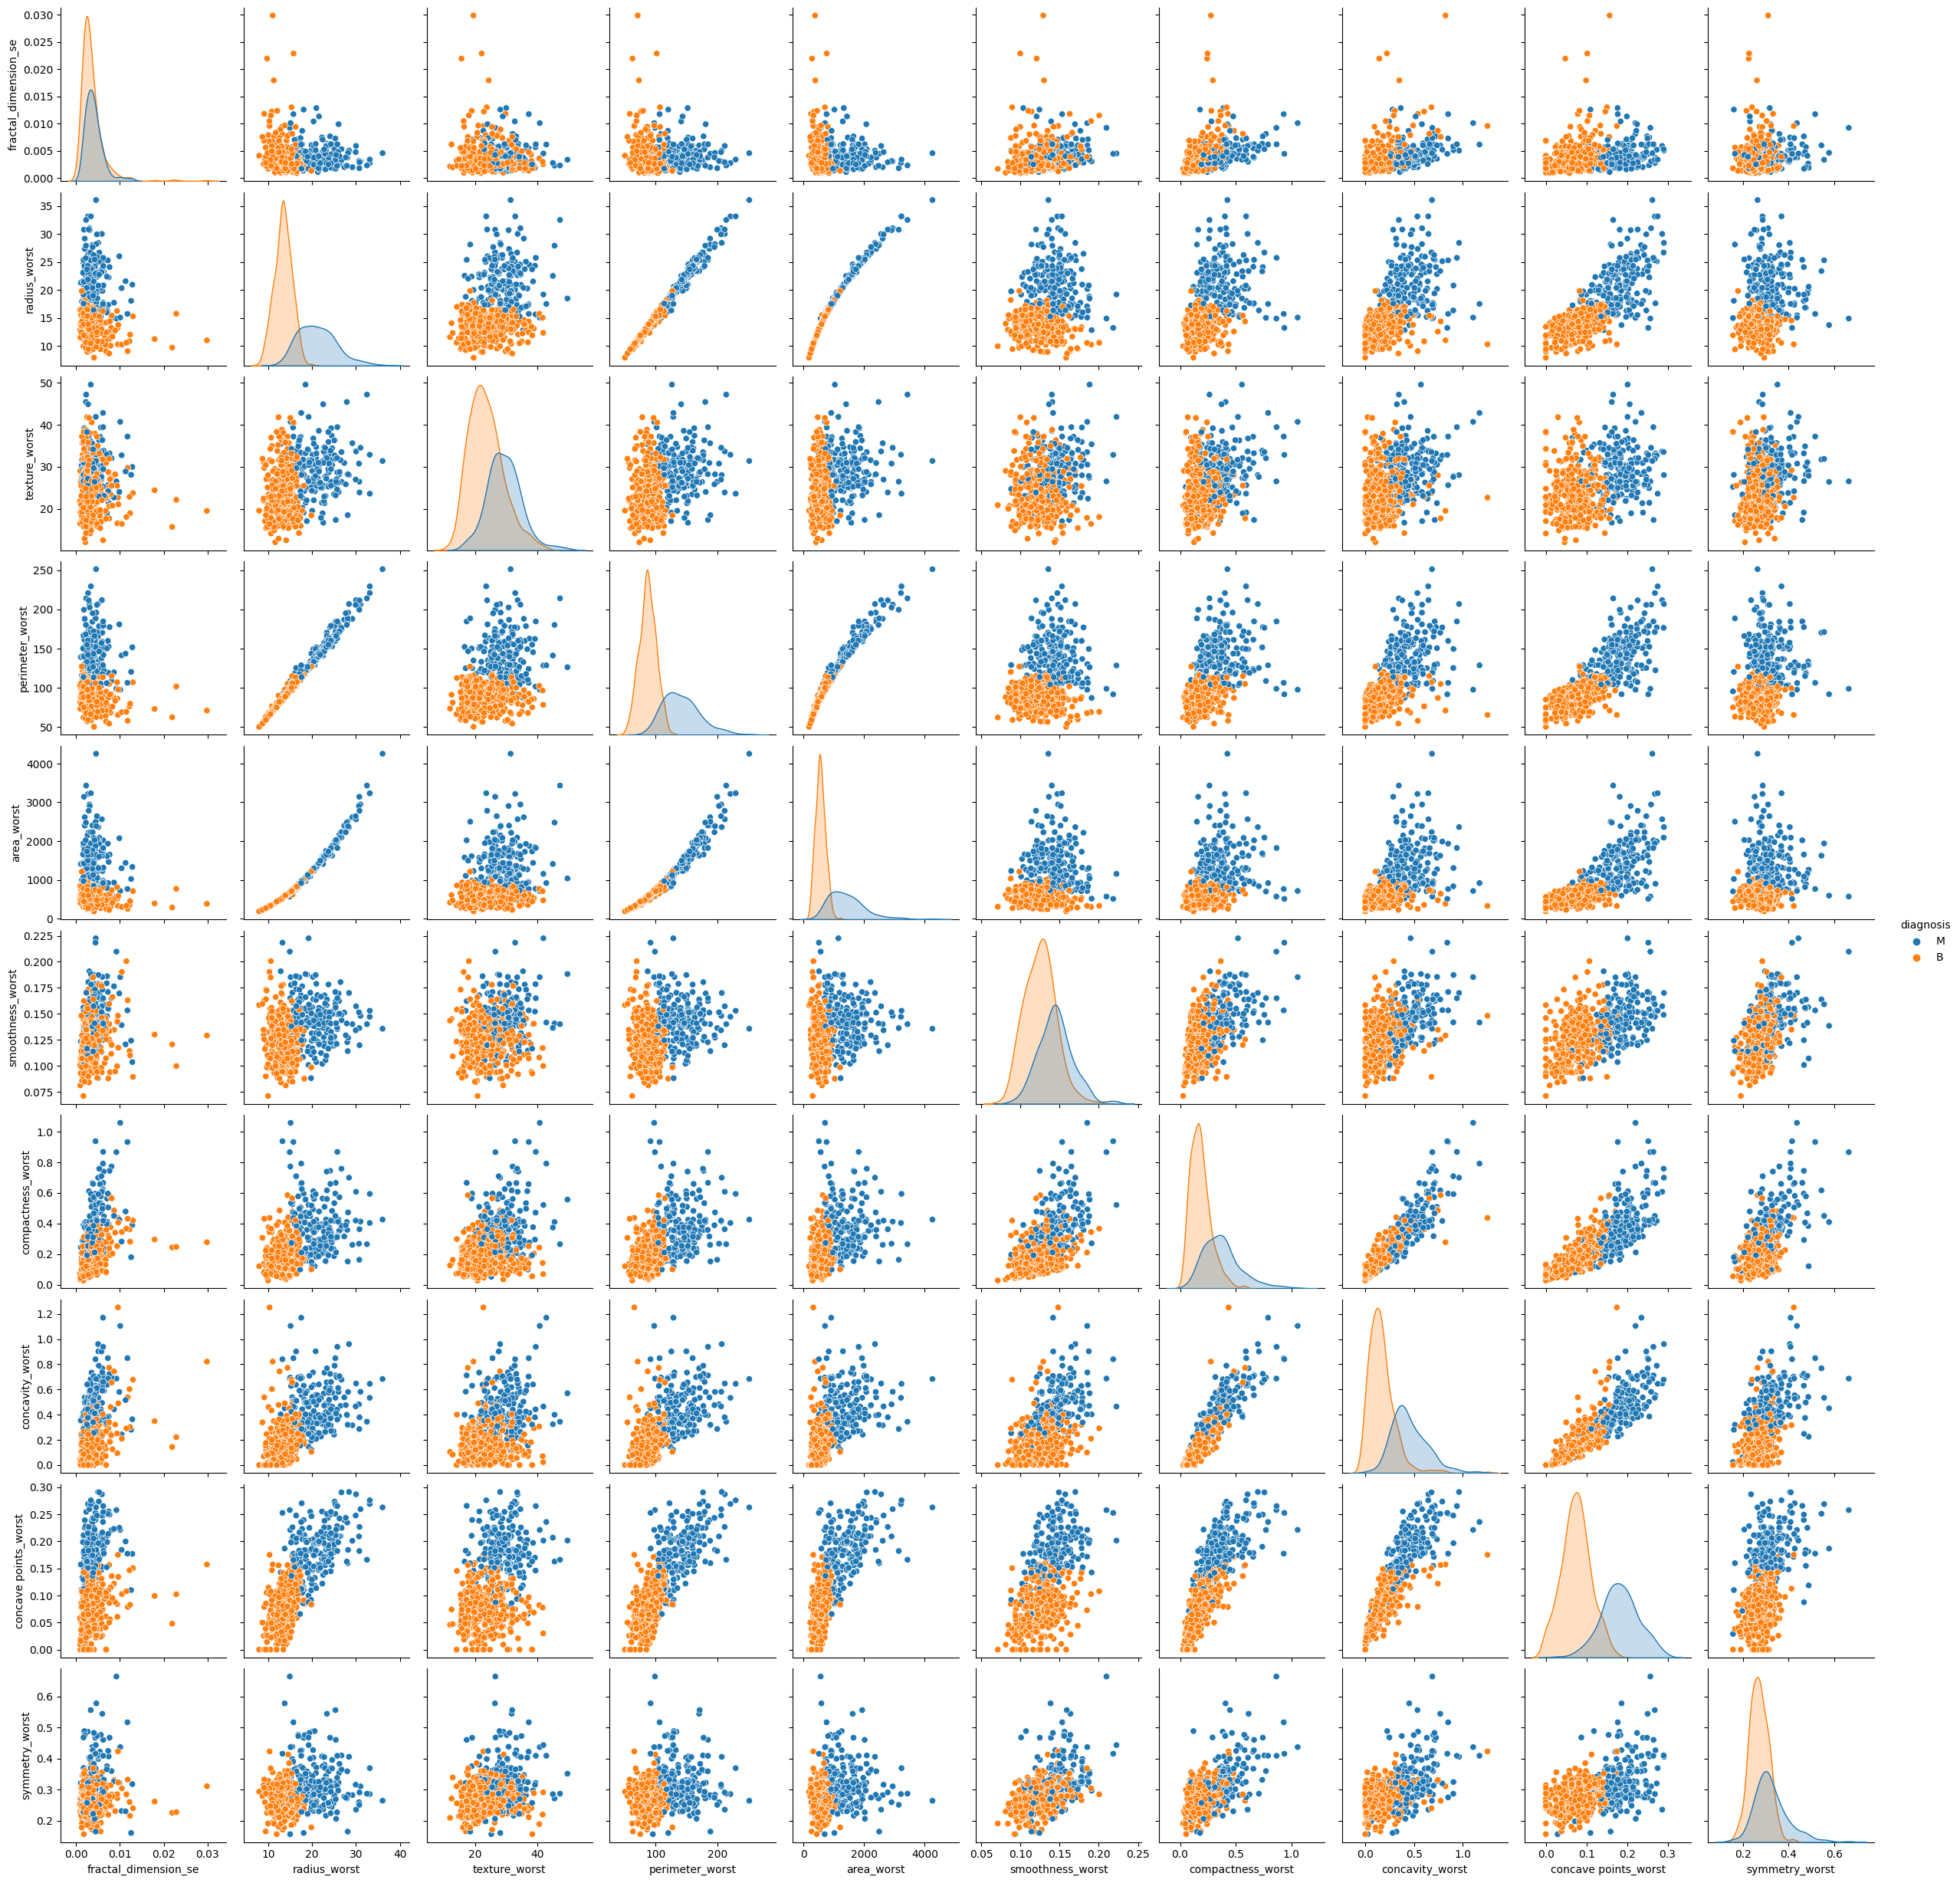

In [7]:
param_list = data.columns
num_subsets = 3
subset_size = len(param_list) // num_subsets

for i in range(num_subsets):
    start_index = i * subset_size
    end_index = (i + 1) * subset_size
    subset_columns = param_list[start_index:end_index].tolist() + ['diagnosis']
    numeric_columns = data[subset_columns].select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    sns.pairplot(data[numeric_columns + ['diagnosis']], hue="diagnosis")
    plt.show()

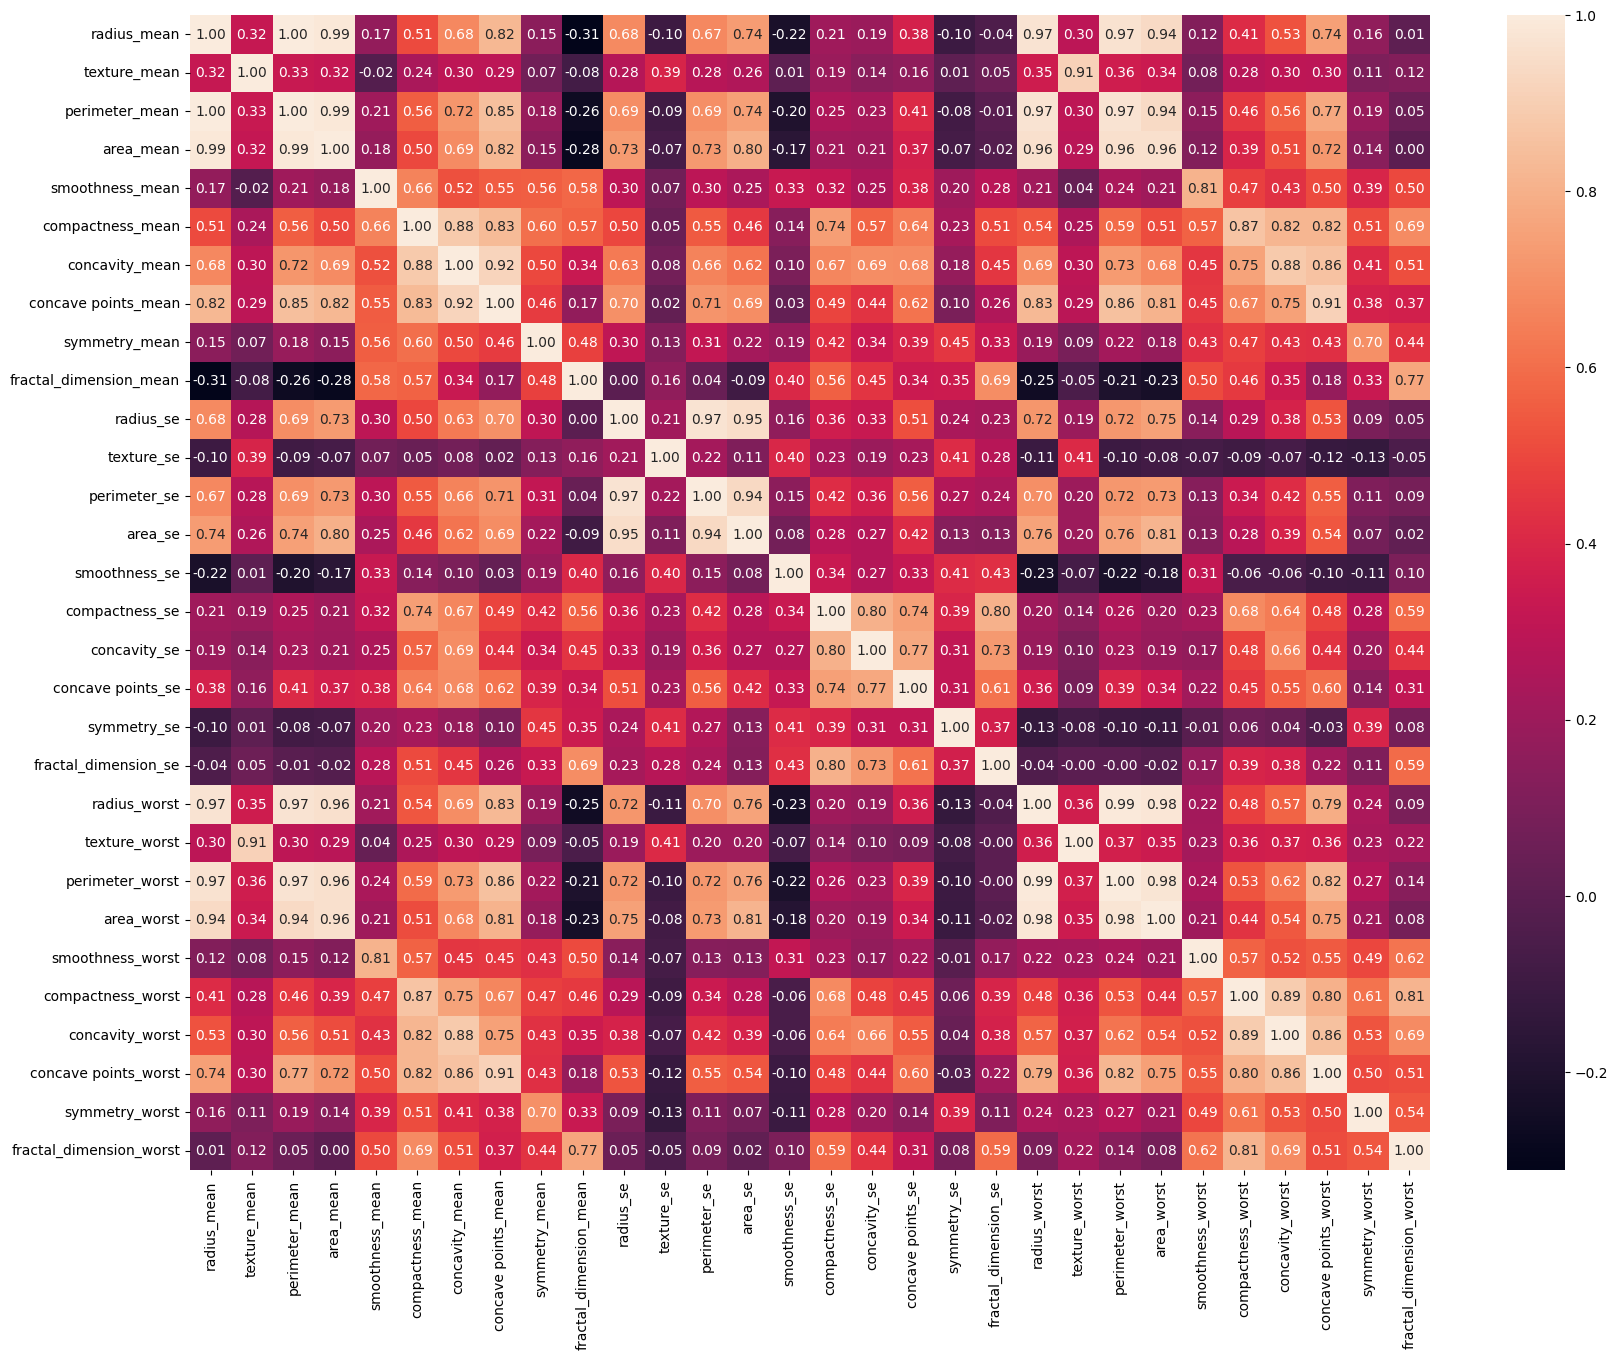

In [8]:
param_list = data.columns
plt.figure(figsize=(20, 15)) 
sns.heatmap(data[param_list[1:]].corr(), annot=True, fmt=".2f")
plt.show() 
# Result: radius_mean - perimeter_mean - area_mean - concave points_mean - radius_worst - area_worst - perimeter_worst correlation is high,
# keep radius_mean is just enough.
# texture_mean - texture_worst correlation is high, keep texture_mean.
# compactness_mean - compactness_worst - concavity_mean, correlation is high. Keep compactness_mean.

<a id="4" > </a>
## Edit Data

In [9]:
# size reduction
data = data.drop(["perimeter_mean", "area_mean", "concave points_mean", "radius_worst", "area_worst", "perimeter_worst", "texture_worst", "compactness_worst", "concavity_mean", "concavity_worst", "radius_se", "area_se"], axis=1) 

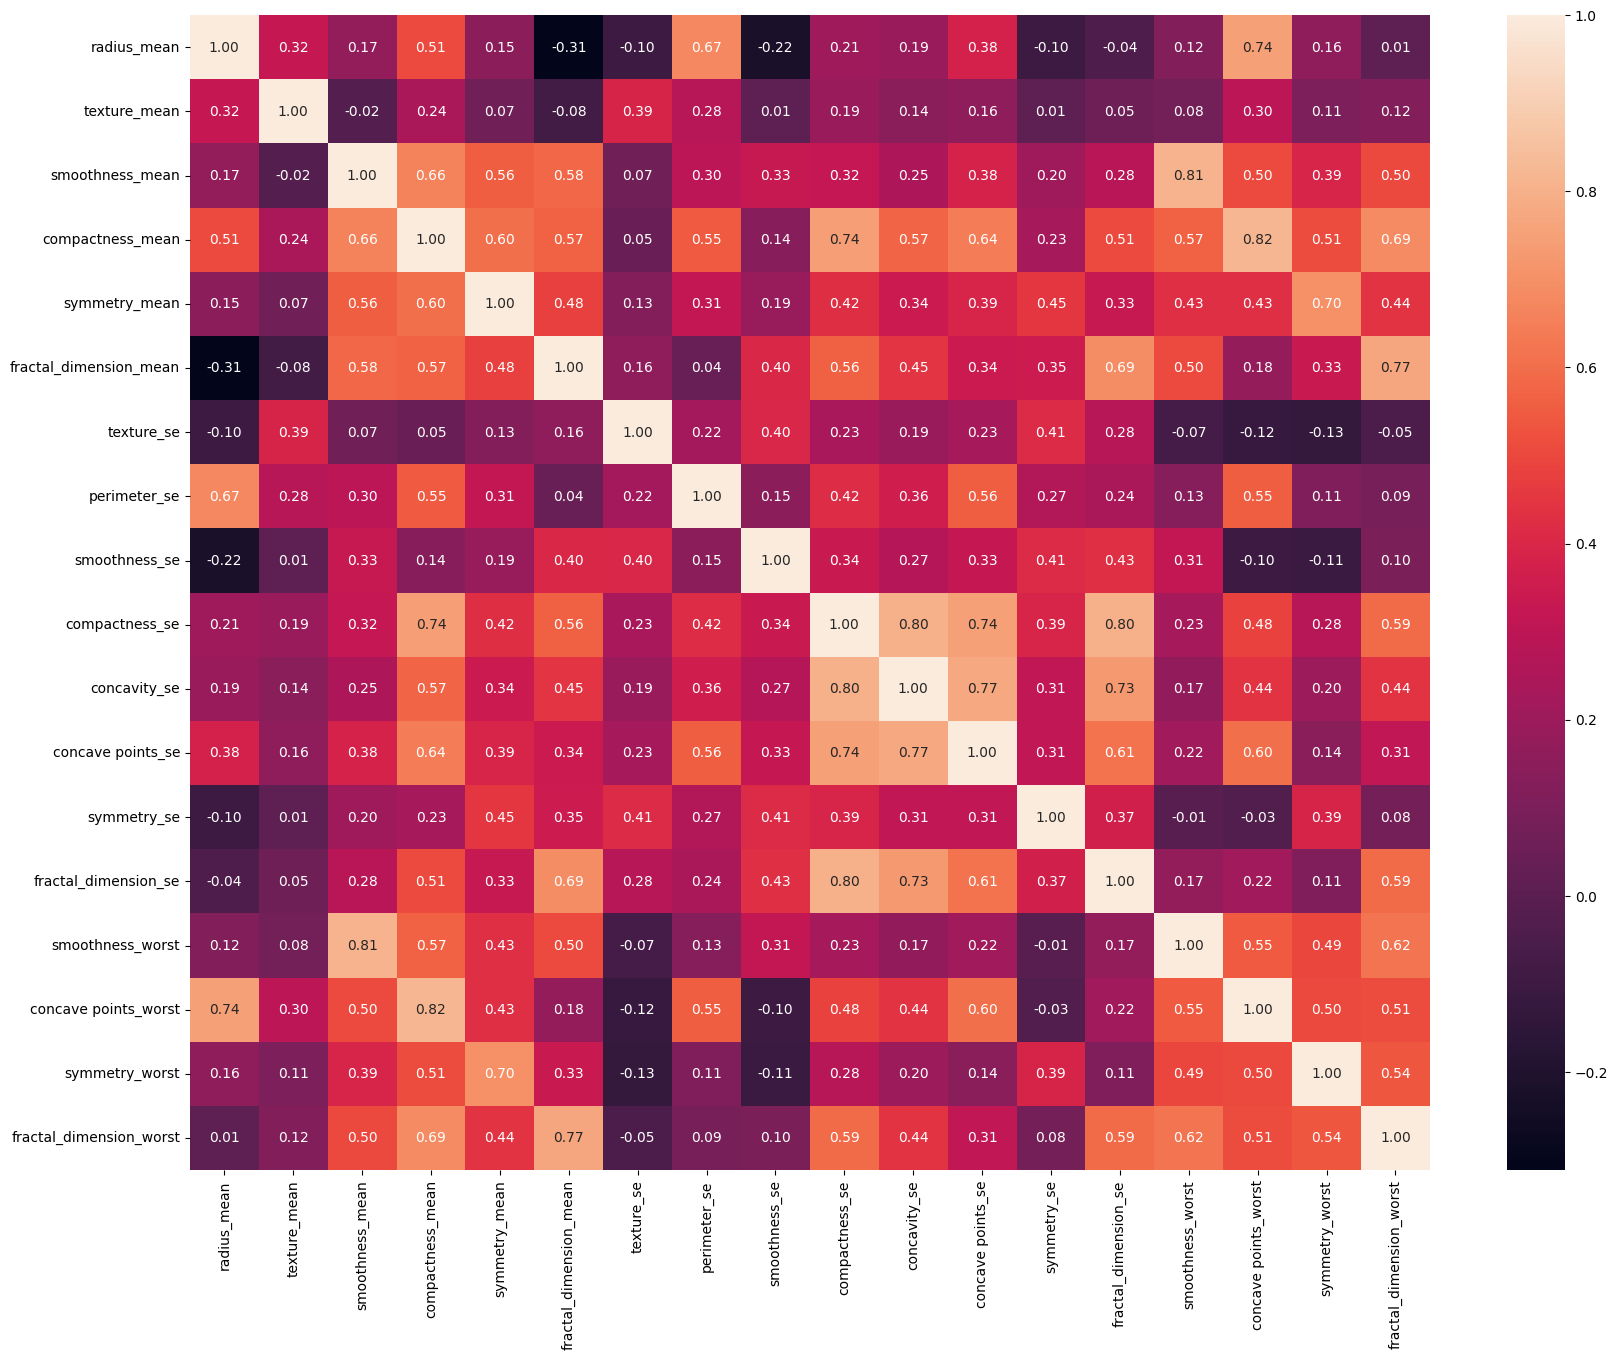

In [10]:
param_list = data.columns
plt.figure(figsize=(20, 15)) 
sns.heatmap(data[param_list[1:]].corr(), annot=True, fmt=".2f")
plt.show() 

In [11]:
# label encoder
string_sutun = 'diagnosis' 
label_encoder = LabelEncoder()
data[string_sutun] = label_encoder.fit_transform(data[string_sutun])
data.head()

diagnosis  radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0          1        17.99         10.38          0.11840           0.27760   
1          1        20.57         17.77          0.08474           0.07864   
2          1        19.69         21.25          0.10960           0.15990   
3          1        11.42         20.38          0.14250           0.28390   
4          1        20.29         14.34          0.10030           0.13280   

   symmetry_mean  fractal_dimension_mean  texture_se  perimeter_se  \
0         0.2419                 0.07871      0.9053         8.589   
1         0.1812                 0.05667      0.7339         3.398   
2         0.2069                 0.05999      0.7869         4.585   
3         0.2597                 0.09744      1.1560         3.445   
4         0.1809                 0.05883      0.7813         5.438   

   smoothness_se  compactness_se  concavity_se  concave points_se  \
0       0.006399         0.04904       0.05373            0.01587   
1       0.005225         0.01308       0.01860            0.01340   
2       0.006150         0.04006       0.03832            0.02058   
3       0.009110         0.07458       0.05661            0.01867   
4       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  smoothness_worst  concave points_worst  \
0      0.03003              0.006193            0.1622                0.2654   
1      0.01389              0.003532            0.1238                0.1860   
2      0.02250              0.004571            0.1444                0.2430   
3      0.05963              0.009208            0.2098                0.2575   
4      0.01756              0.005115            0.1374                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678

<a id="5" > </a>
## Model Training

In [12]:
X = data.drop("diagnosis", axis = 1).values
y = data["diagnosis"].values

In [13]:
# Feature Scaling
sc = StandardScaler()
X = sc.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(381, 18)
(381,)
(188, 18)
(188,)


In [15]:
# select parameter and model
models = [
    {
        'name': 'SVC',
        'model': SVC(),
        'params': {
            "gamma": [0.001, 0.01, 0.1, 1],
            'C': [1,10,50,100,200,300,1000],
            'kernel': ['rbf'],
        }
    },
    {
        'name': 'RandomForestClassifier',
        'model': RandomForestClassifier(),
        'params': {
            "max_features": [1,3,10], 
            "min_samples_split":[2,3,10], 
            "min_samples_leaf":[1,3,10], 
            "bootstrap":[False],
            'n_estimators': [100, 200, 300],
            'criterion': ['gini','entropy'],
        }
    },
    {
        'name': 'LogisticRegression',
        'model': LogisticRegression(),
        'params': {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
        }
    },
    {
        'name': 'KNeighborsClassifier',
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [2,3,5,7,9],
            'weights': ['uniform', 'distance'],
            "metric":["euclidean","manhattan"]
        }
    },
]


best_models = []
for model_info in models:
    grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=5, n_jobs=-1) 
    grid_search.fit(X_train, y_train)  
    best_models.append({
        'name': model_info['name'],
        'best_model': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_
    })


for best_model in best_models:
    print(f"Model: {best_model['name']} \nBest Parameters: {best_model['best_params']} \nBest Score: {round(best_model['best_score'], 2)}%")
    print("-" * 30)

model_names = []
model_scores = []
for best_model in best_models:
    score = best_model['best_score']
    if score >= 0:
        model_names.append(best_model['name'])
        model_scores.append(score)

Model: SVC 
Best Parameters: {'C': 50, 'gamma': 0.01, 'kernel': 'rbf'} 
Best Score: 0.97%
------------------------------
Model: RandomForestClassifier 
Best Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300} 
Best Score: 0.96%
------------------------------
Model: LogisticRegression 
Best Parameters: {'C': 1, 'penalty': 'l2'} 
Best Score: 0.97%
------------------------------
Model: KNeighborsClassifier 
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'} 
Best Score: 0.95%
------------------------------


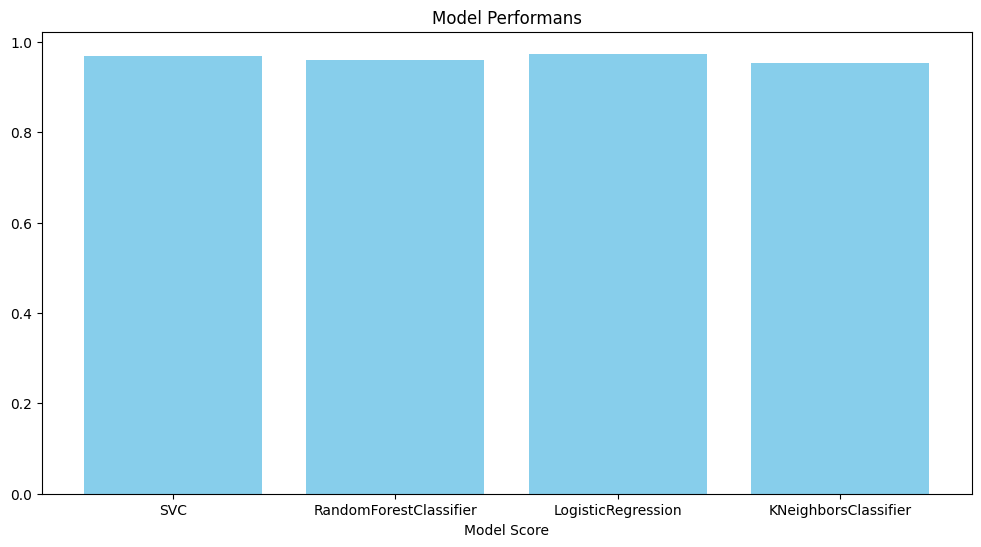

In [16]:
plt.figure(figsize=(12, 6))
plt.bar(model_names, model_scores, color='skyblue')
plt.xlabel('Model Score')
plt.title('Model Performans')
plt.show()

In [17]:
# Logistic Regression
classifier = LogisticRegression(random_state = 42)
logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}


model = GridSearchCV(classifier, param_grid=logreg_param_grid)
model.fit(X_train,y_train)


predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       121
           1       0.96      0.97      0.96        67

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188

[[118   3]
 [  2  65]]
